In [1]:
from random import *
import math

def draw(k_init, init, next, lbd):
    U = random()
    p = init
    S = init
    k = k_init
    while U > S:
        p = next(p, lbd, k)
        S += p
        k += 1
    return k

""" Bernoulli Law """
def bern(lbd):
    return random() < lbd


""" Geometric Law """
def next_geom(p, lbd, k):
    return lbd * p

def geom(lbd):
    return draw(0, (1 - lbd), next_geom, lbd)

def fast_geom(lbd):
    U = random()
    return (int)(math.floor(math.log(U) / math.log(lbd)))


""" Poisson Law """
def next_poiss(p, lbd, k):
    return lbd * p / (k + 1)

def poiss(lbd):
    return draw(0, math.exp(-lbd), next_poiss, lbd)

def non_zero_poiss(lbd):
    return draw(1, lbd / (math.exp(lbd) - 1), next_poiss, lbd)


""" Logarithmic Law """
def next_loga(p, lbd, k):
    return lbd * p * (k) / (k + 1)

def loga(lbd):
    return draw(1, -lbd / math.log(1 - lbd), next_loga, lbd)

In [2]:
P = {}
P[.9] = 777564.20335958218103
P[.99] = 4.815108827e69
P[.995] = 9.343610520e140
P[.997] = 1.291120564e236

def indiceMax(x):
    u = random()
    v = math.log(1/u)
    p = math.log(P[x])
    k = 0
    while v<p :
        k += 1
        p -= x**k/(k*(1-x**k))
    return k

def genP(x):
    k = indiceMax(x)
    print("indice max = ", k)
    size, summands = 0, []
    if k == 0:
        return size, summands
    for i in range(1,k):
        pi = poiss(x**i/(i*(1-x**i)))
        for j in range(pi):
            summand = fast_geom(x**i)+1
            for l in range(i):
                summands.append(summand)
            size += i*summand
    pi = non_zero_poiss(x**k/(k*(1-x**k)))
    for j in range(pi):
        summand = fast_geom(x**k)+1
        for l in range(k):
            summands.append(summand)
        size += k*summand
    return size,summands

In [3]:
ip = genP(.997)
p = sorted(ip[1],reverse = True)
print("taille = {}, plus grand sommant = {}, nombre de sommants = {}".format(ip[0], p[0], (len(ip[1]))))

indice max =  116
taille = 154251, plus grnad sommant = 1330, nombre de sommants = 1441


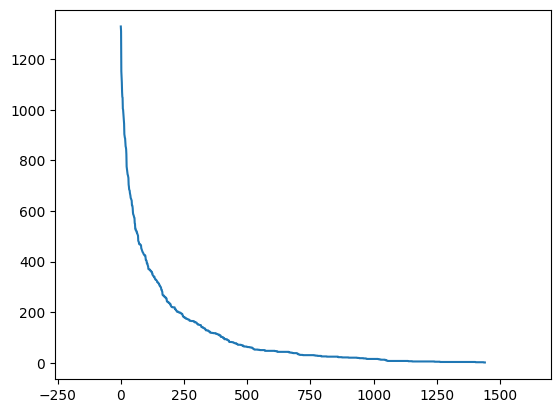

In [4]:
import matplotlib.pyplot as plt
plt.plot(p)
plt.axis('equal')
plt.show()

In [62]:
def genQ(x):
    k = indiceMax(x)
    print("indice max = ", k)
    sizeP, sizeGen, summands = 0, 0, set()
    if k == 0:
        return sizeP, sizeGen, summands
    for i in range(1,k):
        pi = poiss(x**i/(i*(1-x**i)))
        for j in range(pi):
            summand = fast_geom(x**i)+1
            if(i % 2 != 0):
                if(summand in summands):
                    summands.remove(summand)
                else: 
                    summands.add(summand)  
                sizeGen += summand
            sizeP += i*summand
    pi = non_zero_poiss(x**k/(k*(1-x**k)))
    for j in range(pi):
        summand = fast_geom(x**k)+1
        if(k % 2 != 0):
            if(summand in summands):
                summands.remove(summand)
            else: 
                summands.add(summand)  
            sizeGen += summand
        sizeP += k*summand
    return sizeP, sizeGen, summands

In [64]:
ip = genQ(.997)
p = sorted(ip[2],reverse = True)
print("taille de P = {}, taille engendrée = {}, taille de Q = {}".format(ip[0], ip[1], sum(p)))
print("plus grand sommant = {}, nombre de sommants = {}".format(p[0], len(p)))

indice max =  395
taille de P = 165528, taille engendrée = 104338, taille de Q = 79174
plus grand sommant = 1912, nombre de sommants = 203


In [44]:
from collections import defaultdict

def extract(l):
    q = []
    counts = defaultdict(int)
    for summand in l:
        counts[summand] += 1
    for k,v in counts.items():
        if v%2 == 1 :
            q.append(k)
    return q
    

In [61]:
ip = genP(.997)
print(sum(ip[1]),sum(extract(ip[1])))

indice max =  240
175188 89682
